In [ ]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/praktikum/praktikum5'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#MEMBACA FILE CSV MENGGUNAKAN PANDAS
df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
#cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
#cek duplicate
df.duplicated().sum()

np.int64(7308)

In [ ]:
#menghapus data duplicate
df = df.drop_duplicates()

In [ ]:
#cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [ ]:
df =df.rename(columns={
    'Jenis Kelamin':'jenis_kelamin',
    'Umur (bulan)':'umur_bulan',
    'Tinggi Badan (cm)':'tinggi_cm',
    'Berat Badan (kg)':'berat_kg',
    'Stunting':'stunting',
    'Wasting':'wasting'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis Kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


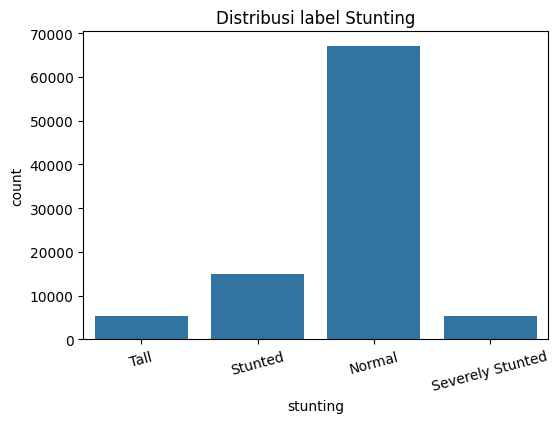

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting',data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)  # urutan kelas (original string labels)
df['stunting'] = stunting_cat.cat.codes               # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['Jenis Kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


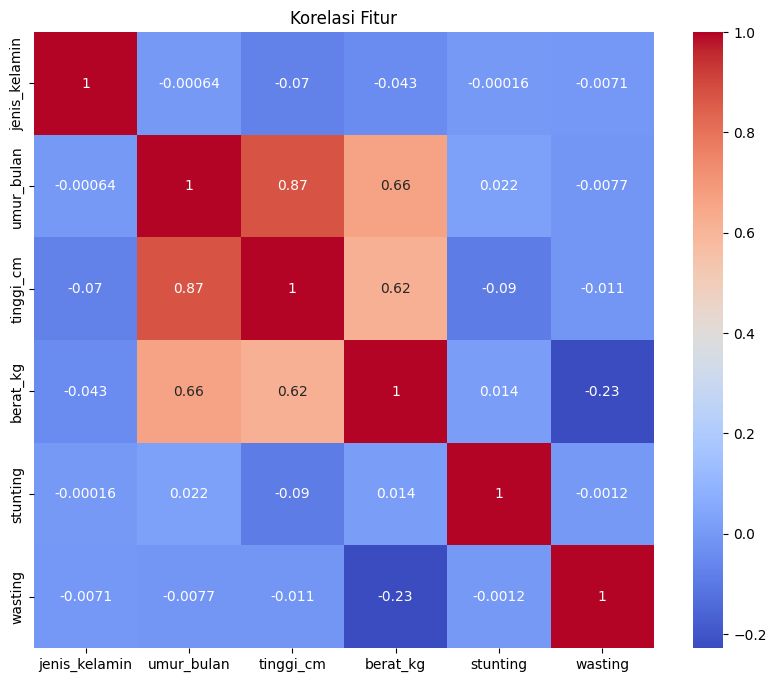

In [ ]:
#korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
#memilih fitur dan target
feature_cols =['umur_bulan','tinggi_cm','berat_kg','wasting']
X = df[feature_cols]
y = df['stunting']

In [ ]:
#Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )
len(X_train), len(X_test)

(74153, 18539)

In [ ]:
#Membaca Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
    )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Stunting Classes:", stunting_classes)
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=[str(x) for x in stunting_classes] # Explicitly convert to string
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]
Stunting Classes: [0, 1, 2, 3]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88     13411
           1       1.00      0.02      0.05      1067
           2       0.59      0.45      0.51      3008
           3       0.80      0.11      0.20      1053

    accuracy                           0.78     18539
   macro avg       0.80      0.39      0.41     18539
weighted avg       0.78      0.78      0.73     18539



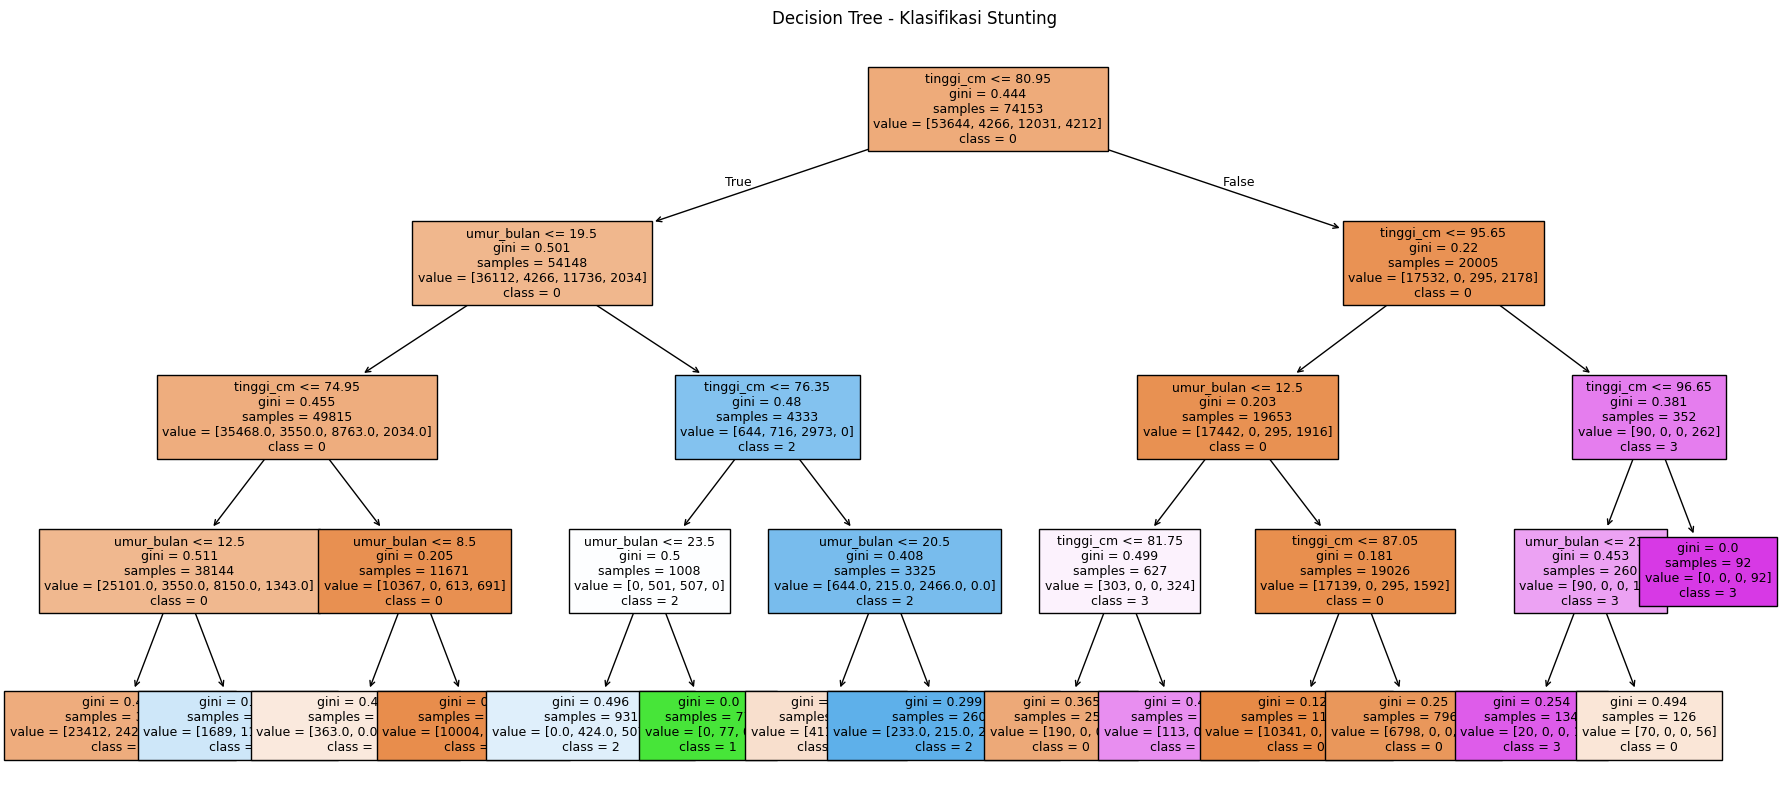

In [ ]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=[str(x) for x in stunting_classes],  # Explicitly convert to string
    filled=True,
    fontsize=9
)

plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()